<a href="https://colab.research.google.com/github/zi-onion/ESAA/blob/main/05_10_Regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07. 로지스틱 회귀

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다.

로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라, 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다.

* 시그모이드 함수는 x 값이 +, -로 아무리 커지거나 작아져도 y 값은 항상 0과 1 사이의 값을 반환한다. x 값이 커지면 1에 근사하며 x 값이 작아지면 0에 근사한다.

* 위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부 판단

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

* 로지스틱 회귀 분류 수행

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포 변환
scaler = StandardScaler() #정규 분포 형태의 표준 스케일링을 적용
data_scaled = scaler.fit_transform(cancer.data)
#데이터 셑 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state=0)

* 학습 및 예측 수행, 정확도와 ROC-AUC 구하기

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy : 0.977
roc_auc : 0.972


=> 정확도가 약 0.977, roc_auc가 약 0.979이다.

* LogisticRegression 클래스의 주요 하이퍼 파라미터에는 ppenalty와 C가 있다.
 * penalty : 규제 유형을 설정하며 l2로 설정시 L2 규제를, l1으로 설정시 l1 규제를 뜻한다.
 * C : C는 규제 강도를 조절하는 alpha 값의 역수이다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터 : {0}, 최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

## 08. 회귀 트리

트리 기반의 회귀는 회귀 트리를 이용하는 것이다. 즉, 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 한다.


회귀 트리는 분류 트리와 크게 다르지 않다. 다만 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있는데, 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.

* 랜덤 포레스트 회귀 트리

In [ ]:
#RandomForestRegressor이용 보스턴 주택 가격 예측
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터셋 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis =1,inplace=False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이터 세트 크기: (506, 14)
 5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


* 결정트리, GBM, XGBoost, LightGBM의 Regressor

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print('##### ', model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

* 다양한 유형의 회귀 트리를 생성하고, 보스턴 주택 가격 예측

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

* 보스턴 주택 가격 모델의 피처별 중요도 시각화

<Axes: xlabel='None', ylabel='None'>

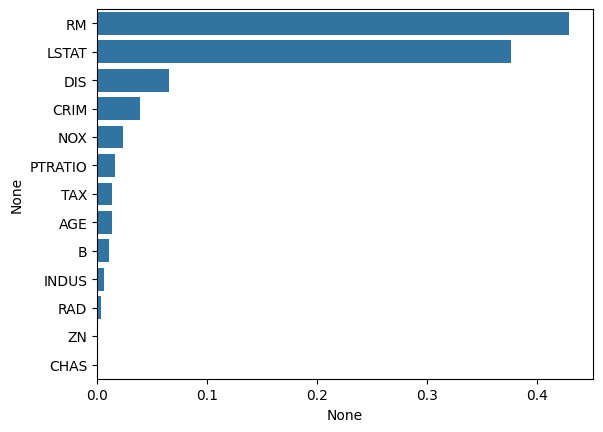

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터셋을 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns )
feature_series = feature_series.sort_values(ascending = False) # 내림차순
sns.barplot(x = feature_series, y = feature_series.index)

* 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화

(100, 2)


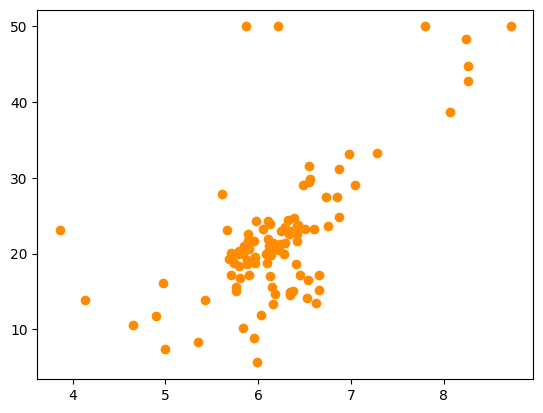

In [ ]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample( n =100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")

* 보스턴 데이터 세트에 대해 LinearRegression과 DecisionTreeRegressor를 max_depth 를 각각 2,7로 학습

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 테스트 데이터셋 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 RM, PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

* 학습된 Regressor에서 예측한 Price 회귀선

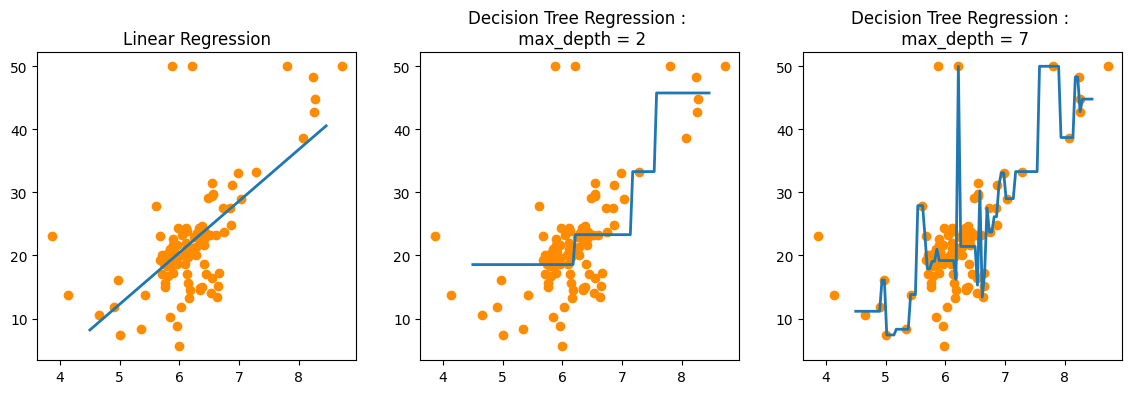

In [ ]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize = (14,4), ncols = 3)

# X축 값을 4.5~ 8.5로 변환하며 입력했을 때 선형회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax1.plot(X_test, pred_lr,label = "linear", linewidth = 2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression : \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax2.plot(X_test, pred_rf2, label = "max_depth : 3", linewidth = 2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression : \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax3.plot(X_test, pred_rf7, label = "max_depth : 7", linewidth = 2)

=> 선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다.

=> max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

## 09. 회귀 실습 - 자전거 대여 수요 예측

캐글의 자전거 대여 수요 예측 경연에서 사용된 학습 데이터 세트 이용

선형회귀와 트리 기반 회귀를 비교

### 1) 데이터 클렌징 및 가공

bike_train.csv 데이터 세트를 이용해 모델을 학습한 후 대여 횟수를 예측

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df=pd.read_csv('/content/train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


=> 10886개의 레코드와 13개의 칼럼으로 구성되어 있음

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


=> null 데이터는 없으며, datetime 칼럼만 object 형임. 이 칼럼을 년, 월, 일, 그리고 시간과 같이 4개의 속성으로 분리한다.

In [ ]:
#문자열을 datetime으로 변경
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

#datetime 타입에서 년,월,일, 시간 추출
bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


=> 새롭게 year, month, dat, hour 칼럼이 추가됨

=> casual 칼럼은 사전에 등록하지 않은 사용자의 자전거 대여 횟수이고, registered는 사전에 등록한 사용자의 대여 횟수이며, 둘을 더하면 count이므로 casual, registered 두 칼럼은 삭제한다.

In [ ]:
drop_columns=['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1,inplace=True)

* RMSE, MSE, RMSLE를 한번에 평가하는 함수 만들기

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

#log 값 변환 시 NaN등의 이슈로 log()가 아닌 log1p()이용해 RMSLE 계산
def rmsle(y,pred):
  log_y=np.log1p(y)
  log_pred=np.log1p(pred)
  squared_error=(log_y-log_pred)**2
  rmsle=np.sqrt(np.mean(squared_error))
  return rmsle

#사이킷런의 mean_squrae_error() 이용해 RMSE 계싼
def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))

#MSE RMSE,RMLSE 모두 계산
def evaluate_regr(y,pred):
  rmsle_val=rmsle(y,pred)
  rmse_val=rmse(y,pred)
  #MAE는 사이킷런의 mean_absolute_error() 계산
  mae_val=mean_absolute_error(y,pred)
  print('RMSLE: {0:.3f},RMSE:{1:.3f},MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

=> rmsle() 함수를 만들 때 주의해야할 점은 넘파이의 log()함수를 이용하거나 사이킷런의 mean_squared_log_error를 이용할 수도 있지만 데이터 값의 크기에 따라 오버플로/언더 플로 오류가 발생하기 쉬움.

In [ ]:
# 다음과 같은 rmsle 구현은 오버플로나 언더플로 오류를 발생하기 쉬움
def rmsle2(y, pred):
  msle2 = mean_squared_log_error(y, pred)
  rmsle2 = np.sqrt(msle2)
  return rmsle2

=> 따라서, log보다는 log1p()를 사용한다. 이는 1을 더해주며 위와 같은 문제를 해결해준다.

### 2) 로그 변환, 피처 인코딩과 모델 학습/예측/평가

* 사이킷런의 LinearRegression을 이용해 회귀 예측

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,LinearRegression

y_target=bike_df['count']
X_features=bike_df.drop(['count'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 1.165,RMSE:140.900,MAE:105.924


=> 실제 target 데이터 값인 대여 횟수를 감안하면 예측 오류로서는 비교적 큰 값이다.

* 실제 값과 예측값의 차이 확인

In [ ]:
def get_top_error_data(y_test,pred,n_tops=5):
  #DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
  result_df=pd.DataFrame(y_test.values,columns=['real_count'])
  result_df['predicted_count']=np.round(pred)
  result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])

  #예측값과 실제값이 가장 큰 데이터 순으로 출력
  print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


=> 가장 큰 상위 5개의 오류값은 546~568로 실제 값을 감안하면 매우 크다. 이렇게 큰 예측 오류가 발생하면 가장 먼저 target 값의 분포가 왜곡된 형태를 가졌는지 확인해봐야한다.

<Axes: >

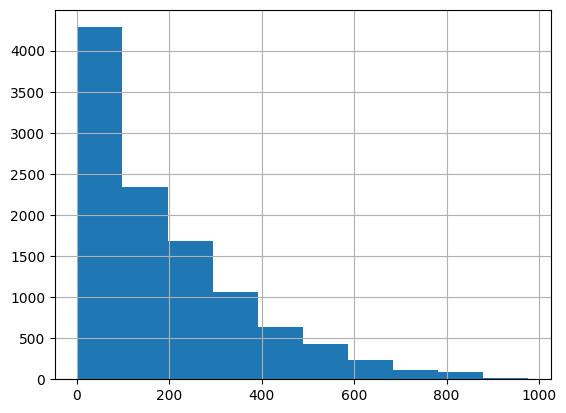

In [ ]:
y_target.hist()

=> count 칼럼 값이 정규분포가 아닌 0~200 사이에 왜곡되어 있음을 알 수 있다. 이럴땐 로그 변환을 사용한다. 변경된 target 값을 기반으로 학습하고, 예측한 값은 다시 expm1()함수를 이용해 원래 scale 값으로 원상복구한다.

<Axes: >

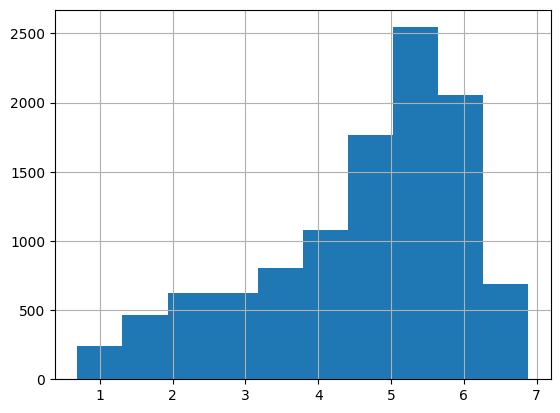

In [ ]:
y_log_transform=np.log1p(y_target)
y_log_transform.hist()

* 다시 학습한 후 평가

In [ ]:
#타깃 칼럼인 count값을 log1p로 로그 변환
y_target_log=np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train,X_test,y_train,y_test=train_test_split(X_features,y_target_log,test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred=lr_reg.predict(X_test)

#테스트 데이터 세트의 Target 값은 로그 변환 됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp=np.expm1(y_test)

#예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp=np.expm1(pred)

evaluate_regr(y_test_exp,pred_exp)

RMSLE: 1.017,RMSE:162.594,MAE:109.286


=> RMSLE 오류는 줄어들었지만, RMSE는 오히려 늘어남

* 각 피처의 회귀 계수 값을 시각화

<Axes: ylabel='None'>

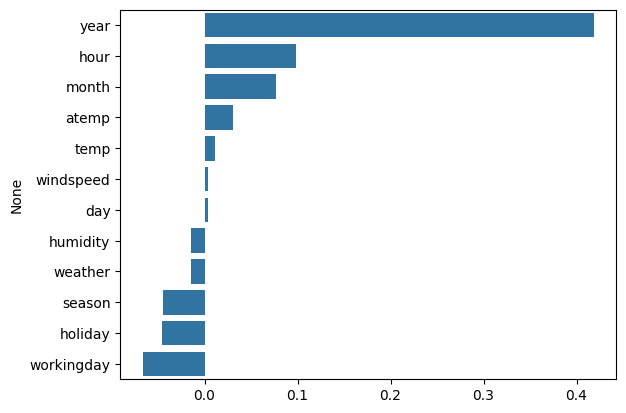

In [ ]:
coef=pd.Series(lr_reg.coef_,index=X_features.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

=> year의 회귀 계수가 큰 이유는 연도를 뜻하므로 카테고리형 피처이지만, 숫자형 값으로 돼있기 때문이다. 더군다나 아주 큰 값인 2011,2013로 되어 있기 때문에 크게 영향을 받았다. 따라서, 이는 원핫인코딩을 해야한다.

In [ ]:
X_features_ohe=pd.get_dummies(X_features,columns=['year','month','day','hour','holiday',
                                                  'workingday','season','weather'])

* LinearRegression, Ridge, Lasso를 모두 학습해 예측 성능 확인

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#원핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train,X_test,y_train,y_test=train_test_split(X_features_ohe,y_target_log,test_size=0.3,random_state=0)

#모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=False):
  model.fit(X_train,y_train)
  pred=model.predict(X_test)
  if is_expm1:
    y_test=np.expm1(y_test)
    pred=np.expm1(pred)
  print('###',model.__class__.__name__,'###')
  evaluate_regr(y_test,pred)

#end of function get_model_predict

#모델 별 평가 수행
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg,lasso_reg]:
  get_model_predict(model,X_train,X_test,y_train,y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.590,RMSE:97.688,MAE:63.382
### Ridge ###
RMSLE: 0.590,RMSE:98.529,MAE:63.893
### Lasso ###
RMSLE: 0.635,RMSE:113.219,MAE:72.803


=> 원핫인코딩을 적용하고 나서 선형 회귀의 예측 성능이 향상됨.

* 다시 피처 시각화

<Axes: ylabel='None'>

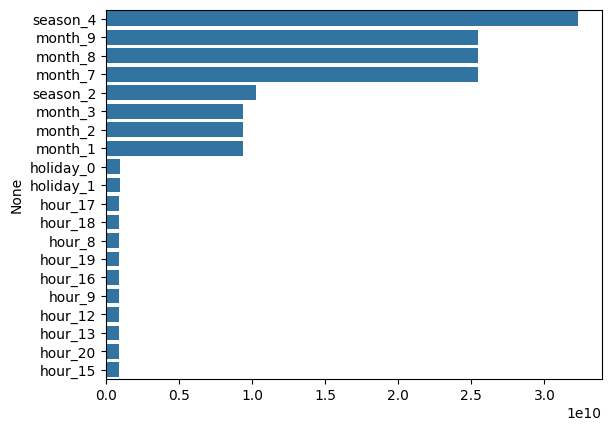

In [ ]:
coef=pd.Series(lr_reg.coef_,index=X_features_ohe.columns)
coef_sort=coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values,y=coef_sort.index)

=> 월, 주말/주중, 그리고 시간대 등 상식선에서 자전거를 타는데 필요한 피처의 회귀계수가 커짐

* 회귀 트리를 이용해 회귀 예측 수행

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import  LGBMRegressor

#랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg=RandomForestRegressor(n_estimators=500)
gbm_reg=GradientBoostingRegressor(n_estimators=500)
xgb_reg=XGBRegressor(n_estimators=500)
lgbm_reg=LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
  #XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능.ndarray로 변환
  get_model_predict(model,X_train.values,X_test.values,y_train.values,y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.355,RMSE:50.270,MAE:31.150
### GradientBoostingRegressor ###
RMSLE: 0.330,RMSE:53.332,MAE:32.738
### XGBRegressor ###
RMSLE: 0.339,RMSE:51.475,MAE:31.357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 72
[LightGBM] [Info] Start training from score 4.582043
### LGBMRegressor ###
RMSLE: 0.319,RMSE:47.215,MAE:29.029
